# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=2x+1,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\sum_{n=1}^{\infty} \frac{2(1+3(-1)^{n+1})}{n\pi}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Graficando condicion inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = 2*x[i]+1
    return y

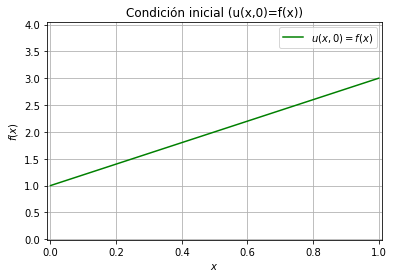

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=f(x)$',color="g")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,4.04]),grid(),legend()
show()

Aproximando la condicion inicial con series de fourier $u(x,0)=f(x)=x$.

In [ ]:
def u_0(x,N=30): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f +=(1+3* (-1)**(n+1))*sin(n*pi*x)/(n)
    return (2.0/pi)*f

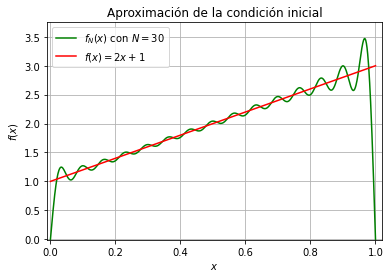

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=30$',color="g")
plot(x,f,label='$f(x)=2x+1$',color="r")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.02]),ylim([-0.01,3.75]),grid(),legend()
show()

Visualizando  para diferentes  armónicos.

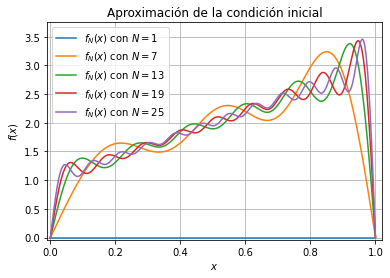

In [ ]:
for i in range(1,30,6):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.02]),ylim([-0.04,3.75]),grid(),legend()
show()

Se agrega el tiempo para tener la solucion completa. Primero, para: $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (1+3*(-1)**(n+1))*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,1,1000)
U = u_x_t(x,t)

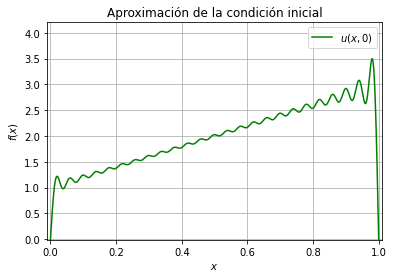

In [ ]:
plot(x,U[:,0],label='$u(x,0)$',color="g")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,4.2]),grid(),legend()
show()

Probando para diferentes tiempos, se podra ver como evoluciona cuando $t \to \infty$.

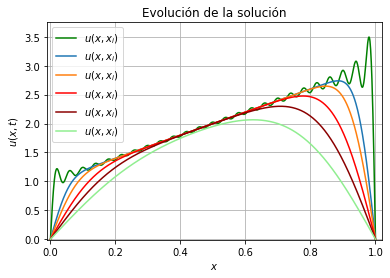

In [ ]:
plot(x,U[:,0],label='$u(x,x_i)$',color="g") 
plot(x,U[:,1],label='$u(x,x_i)$')
plot(x,U[:,2],label='$u(x,x_i)$')
plot(x,U[:,5],label='$u(x,x_i)$',color="r")
plot(x,U[:,10],label='$u(x,x_i)$',color="darkred")
plot(x,U[:,20],label='$u(x,x_i)$',color="lightgreen")
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.02]),ylim([-0.01,3.75]),grid(),legend()
show()

Grafica 3D.

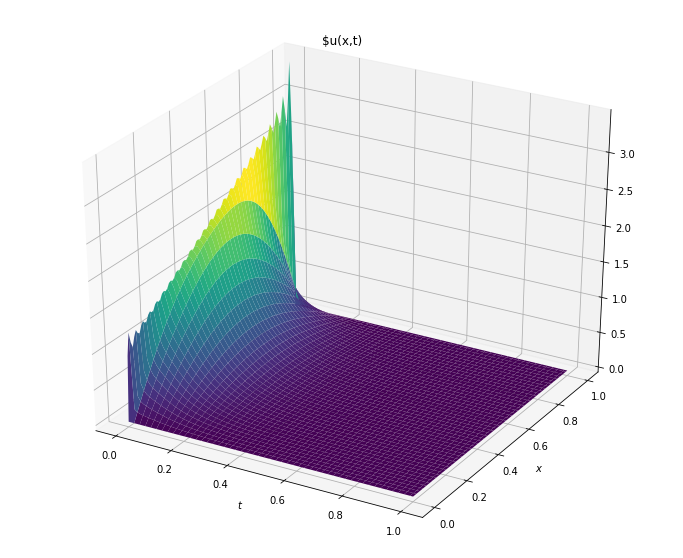

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title('$u(x,t)') 
grid()
ax.plot_surface(X, T, U, cmap="viridis");  #Otros colores:"viridis", "inferno", "plasma"